# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize period)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
#start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define the periods

In [4]:
periods = range(50, 525, 25)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, sma_period=int(period))
    strategies[period].run()
    _, strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 

Summarize results

In [6]:
metrics = ('start',
           'ending_balance',
           'annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'trades_per_year',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
start,1993-04-12,1993-05-17,1993-06-22,1993-07-28,1993-09-01,1993-10-07,1993-11-11,1993-12-17,1994-01-24,1994-03-01,1994-04-06,1994-05-12,1994-06-17,1994-07-25,1994-08-29,1994-10-04,1994-11-08,1994-12-14,1995-01-20
ending_balance,22165.70,29112.80,22556.20,24219.66,25503.72,29964.10,39994.12,49836.00,47926.06,44689.18,46574.03,53816.72,53263.76,67862.37,65839.99,62034.52,54329.48,54409.82,51650.48
annual_return_rate,2.96,4.01,3.05,3.33,3.55,4.18,5.33,6.23,6.10,5.84,6.03,6.64,6.62,7.65,7.55,7.34,6.81,6.84,6.65
max_closed_out_drawdown,-42.82,-42.65,-49.83,-44.21,-38.23,-32.77,-28.66,-22.78,-21.29,-25.87,-25.44,-23.19,-27.33,-25.88,-24.09,-26.99,-31.20,-29.38,-29.71
drawdown_annualized_return,-14.45,-10.63,-16.33,-13.26,-10.78,-7.83,-5.37,-3.66,-3.49,-4.43,-4.22,-3.49,-4.13,-3.38,-3.19,-3.68,-4.58,-4.29,-4.46
drawdown_recovery,-9.71,-3.91,-3.75,-3.75,-3.75,-3.75,-3.75,-0.30,-3.08,-0.21,-0.67,-0.21,-0.22,-0.24,-0.25,-0.63,-0.64,-0.64,-0.64
best_month,12.78,12.32,15.04,15.04,14.99,15.03,12.95,12.93,12.95,12.95,12.95,15.12,15.17,15.14,15.78,15.75,17.77,17.78,17.76
worst_month,-14.35,-16.55,-16.57,-13.58,-17.36,-17.30,-17.37,-17.37,-18.73,-17.21,-18.85,-18.87,-18.91,-18.89,-18.90,-18.92,-20.78,-20.76,-22.82
sharpe_ratio,0.33,0.41,0.33,0.35,0.36,0.41,0.50,0.57,0.55,0.52,0.53,0.57,0.56,0.63,0.62,0.60,0.56,0.56,0.54
sortino_ratio,0.34,0.45,0.35,0.37,0.39,0.44,0.55,0.63,0.61,0.58,0.58,0.63,0.63,0.72,0.71,0.68,0.63,0.63,0.61


Bar graphs

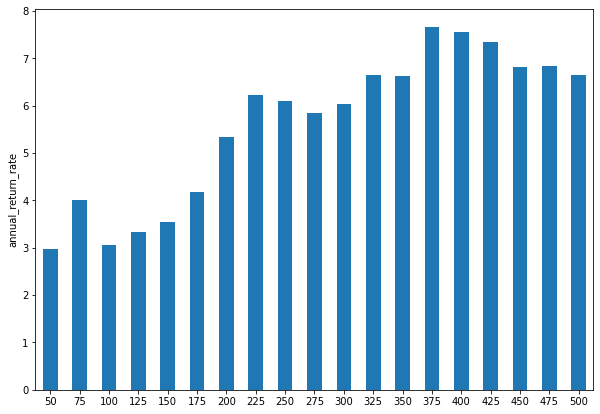

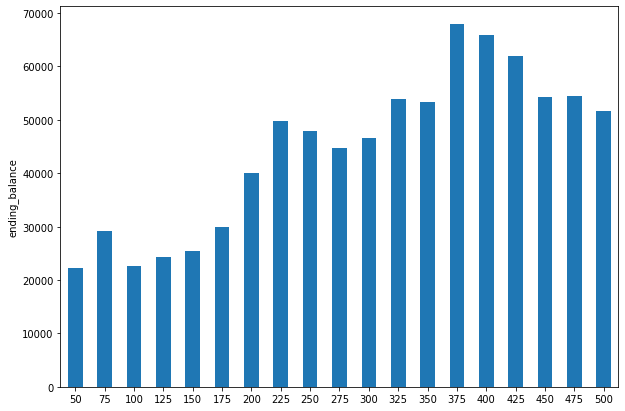

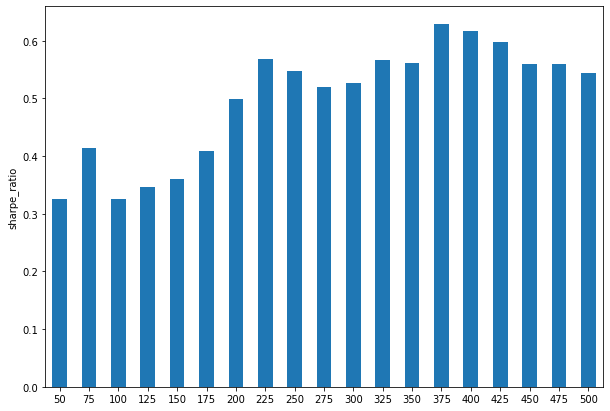

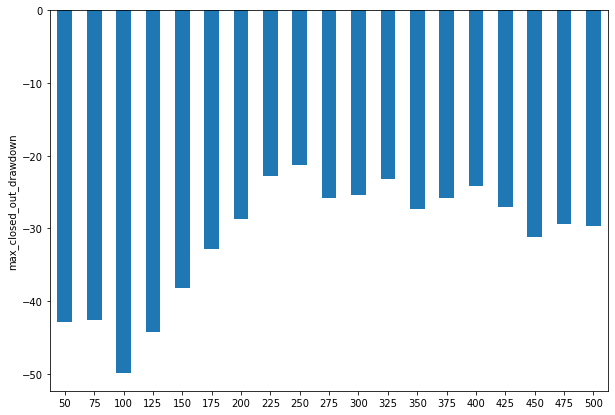

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'ending_balance')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-04-12 00:00:00 BUY  222 SPY @ 44.91
2020-07-15 00:00:00 SELL 222 SPY @ 321.85


Equity curve

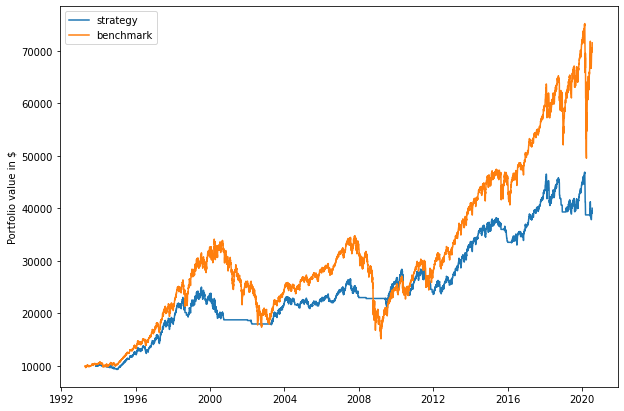

In [9]:
pf.plot_equity_curve(strategies['200'].dbal, benchmark=benchmark.dbal)